In [1]:
#accuracy=(TP+TN)/(TP+TN+FP+FN)
#tp=true positive
#tn=true negative
#fp=false positive
#fn=false negative

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
import numpy as n

In [4]:
dataset=pd.read_csv("G:\programs\Social_Network_Ads.csv")

In [6]:
dataset.head(6)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0


In [12]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [13]:
#splitting data into training st and test set


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
#fitting logistic regression to the training set


In [19]:
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression(random_state=0)                      #cl=classifier
cl.fit(x_train,y_train)

G:\anaconda\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#predict the test set results

In [22]:
y_pred=cl.predict(x_test)
x_pred=cl.predict(x_train)   #making the confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [26]:
#visualising the training set results

In [43]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=n.meshgrid(n.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                n.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

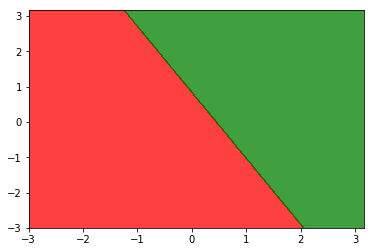

In [34]:
plt.contourf(x1,x2,cl.predict(n.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))

(-2.5825424477554764, 3.3274575522443977)

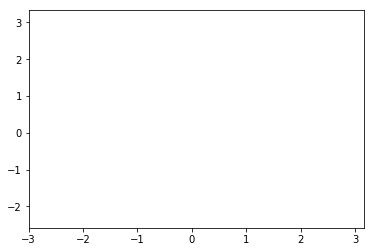

In [44]:
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


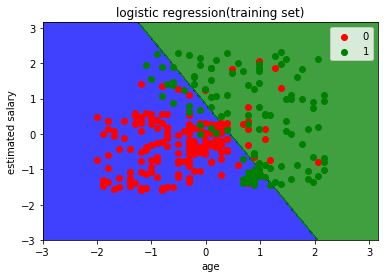

In [41]:
plt.contourf(x1,x2,cl.predict(n.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('blue','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(n.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('logistic regression(training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()
    